In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('log.csv')
data = data.set_index(data['Company ID'])
data = data.drop('Company ID', axis=1)
data.head()

DSRI       GMI       AQI        SGI      DEPI      SGAI  \
Company ID                                                                
1           1.624742  1.128927  7.185053   0.366211  1.381519  1.624145   
2           1.000000  1.606492  1.004988  13.081430  0.400000  5.198207   
3           1.000000  1.015607  1.241389   1.475018  1.169353  0.647671   
4           1.486239  1.000000  0.465535   0.672840  2.000000  0.092890   
5           1.000000  1.369038  0.637112   0.861346  1.454676  1.741460   

                ACCR      LEVI  label  
Company ID                             
1          -0.166810  1.161082      1  
2           0.060475  0.986732      1  
3           0.036732  1.264305      1  
4           0.273434  0.680975      1  
5           0.123048  0.939047      1

In [3]:
target_count = data.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Class 0: 1200
Class 1: 39
Proportion: 30.77 : 1


In [4]:
df_class_0 = data[data['label'] == 0]
df_class_1 = data[data['label'] == 1]
count_class_0, count_class_1 = data.label.value_counts()

Random under-sampling:
0    89
1    39
Name: label, dtype: int64


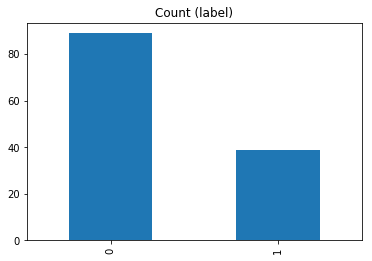

In [5]:
df_class_0_under = df_class_0.sample(count_class_1+50)
new_data = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(new_data.label.value_counts())

new_data.label.value_counts().plot(kind='bar', title='Count (label)');

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(new_data.iloc[:,0:8]
                                                   , new_data.iloc[:,8], test_size=0.33, random_state=42)
X_test.shape

(43, 8)

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
y_pred = clf.predict(X_test)

prob = clf.predict_proba(X_test) 

clf.score(X_test, y_test)

0.7674418604651163

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score
confusion_matrix(y_test, y_pred)

array([[27,  4],
       [ 6,  6]])

In [43]:
THRESHOLDS = np.linspace(0.1, 0.5, num=10)
# result = pd.DataFrame(columns=["THRESHOLD","accuracy","recall", "precision", "roc_auc_score"])
result = []
for THRESHOLD in THRESHOLDS:
    
    preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

    result.append([THRESHOLD,accuracy_score(y_test, preds), recall_score(y_test, preds)
                       ,precision_score(y_test, preds), roc_auc_score(y_test, preds)])

In [55]:
results = pd.DataFrame(result,columns=["THRESHOLD","accuracy","recall", "precision", "roc_auc_score"]) 
results

THRESHOLD  accuracy    recall  precision  roc_auc_score
0   0.100000  0.348837  1.000000   0.300000       0.548387
1   0.144444  0.465116  1.000000   0.342857       0.629032
2   0.188889  0.627907  1.000000   0.428571       0.741935
3   0.233333  0.697674  0.833333   0.476190       0.739247
4   0.277778  0.767442  0.750000   0.562500       0.762097
5   0.322222  0.744186  0.666667   0.533333       0.720430
6   0.366667  0.767442  0.666667   0.571429       0.736559
7   0.411111  0.767442  0.583333   0.583333       0.711022
8   0.455556  0.767442  0.500000   0.600000       0.685484
9   0.500000  0.767442  0.500000   0.600000       0.685484

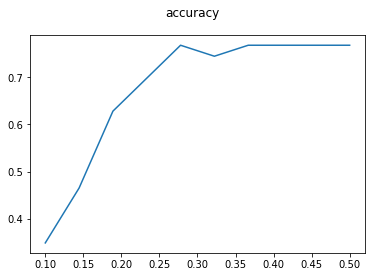

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(results.THRESHOLD,results.accuracy)
fig.suptitle('accuracy')
plt.show()

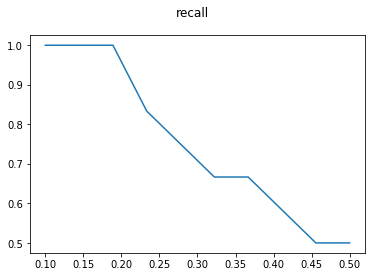

In [65]:
fig = plt.figure()
plt.plot(results.THRESHOLD,results.recall)
fig.suptitle('recall')
plt.show()

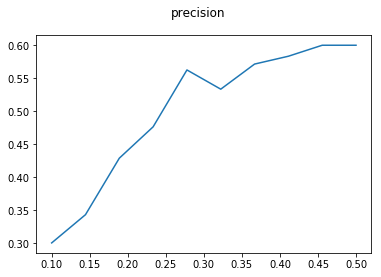

In [67]:
fig = plt.figure()
plt.plot(results.THRESHOLD,results.precision)
fig.suptitle('precision')
plt.show()

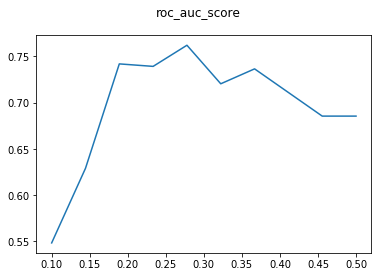

In [68]:
fig = plt.figure()
plt.plot(results.THRESHOLD,results.roc_auc_score)
fig.suptitle('roc_auc_score')
plt.show()